# Classificação Não Supervisionada

## Preparando ambiente

In [1]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Loading required package: raster

Loading required package: sp



In [2]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-27, (SVN revision 1148)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5



## Área de interesse

In [4]:
aoi = stack('cipef_50cm_v2.tif')
res(aoi)
aoi@layers

[1] 0.5000711 0.5002080

[[1]]
class      : RasterLayer 
band       : 1  (of  4  bands)
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent     : 650876.4, 651011, 7986801, 7986920  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : cipef_50cm_v2.tif 
names      : cipef_50cm_v2.1 
values     : 0, 255  (min, max)


[[2]]
class      : RasterLayer 
band       : 2  (of  4  bands)
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent     : 650876.4, 651011, 7986801, 7986920  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : cipef_50cm_v2.tif 
names      : cipef_50cm_v2.2 
values     : 0, 255  (min, max)


[[3]]
class      : RasterLayer 
band       : 3  (of  4  bands)
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent    

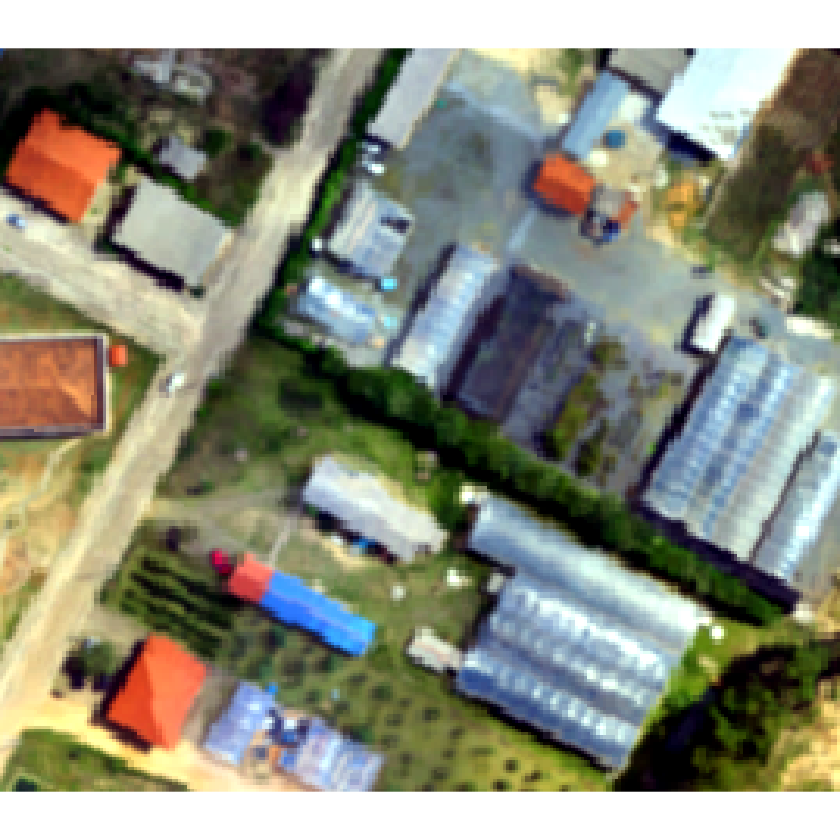

In [5]:
plotRGB(aoi, r = 1, g = 2, b = 3, stretch = 'lin')

In [6]:
blue = getValues(aoi[[1]])
green = getValues(aoi[[2]])
red = getValues(aoi[[3]])
nr = cbind(blue, green, red)

## Classificação

In [7]:
kmncluster = kmeans(na.omit(nr), centers = 2, iter.max = 500, nstart = 4, algorithm="Lloyd")
str(kmncluster)

List of 9
 $ cluster     : int [1:64022] 2 2 2 2 2 2 2 2 2 2 ...
 $ centers     : num [1:2, 1:3] 142 77.4 135.4 76.9 131.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:3] "blue" "green" "red"
 $ totss       : num 3.45e+08
 $ withinss    : num [1:2] 67474931 57508617
 $ tot.withinss: num 1.25e+08
 $ betweenss   : num 2.2e+08
 $ size        : int [1:2] 31595 32427
 $ iter        : int 11
 $ ifault      : NULL
 - attr(*, "class")= chr "kmeans"


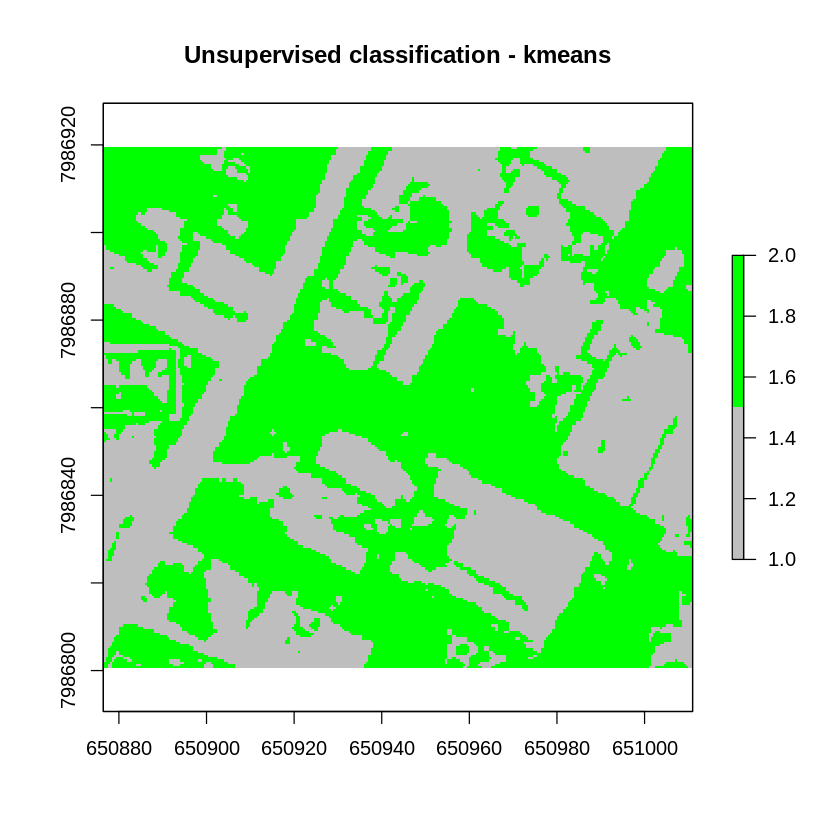

In [8]:
mycolor = c("gray","green")

classified = setValues(aoi[[1]], kmncluster$cluster)
plot(classified, main = 'Unsupervised classification - kmeans', col=mycolor)